In [ ]:
! pip install ultralytics

In [ ]:
!pip install opencv-python google-colab

## Problema Proposto:
  # Contagem de manifestantes ou pessoas na rua através de fotos ou vídeos.

  * Contagem de pessoas em uma foto lado ao lado contou corretamente a quantidade.

  * Contagem de pessoas em uma manifestação ainda não esta boa porquê identificou apenas 3 em dezenas de pessoas que estava na foto.

  * Solução proposta melhorar a identificação de pessoas em grandes volumes de pessoas.

Digite o caminho da imagem: /content/manifestacao 06-04 - governos.jpeg

0: 352x640 9 persons, 47.6ms
Speed: 2.0ms preprocess, 47.6ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)
Total de pessoas detectadas: 9


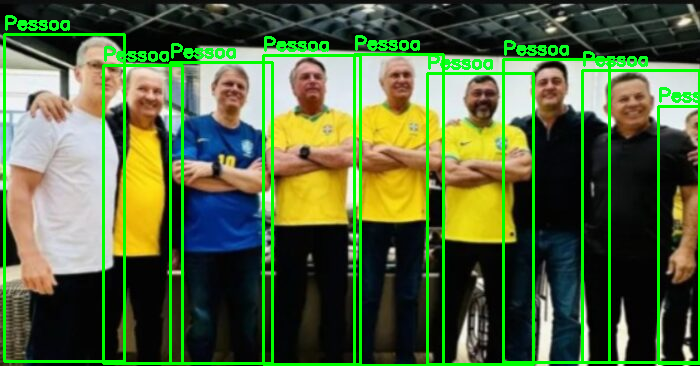

In [ ]:
from ultralytics import YOLO
import cv2
# Import the cv2_imshow function from google.colab.patches
from google.colab.patches import cv2_imshow

def contar_pessoas(imagem_path):
    # Carrega o modelo YOLO pré-treinado (versão small)
    modelo = YOLO("yolov8l.pt")  # Você pode usar "yolov5s.pt" se estiver usando yolov5

    # Carrega a imagem
    imagem = cv2.imread(imagem_path)

    # Faz a inferência (detecção)
    resultados = modelo(imagem)

    # Inicializa contador de pessoas
    contador_pessoas = 0

    # Percorre as detecções
    for resultado in resultados:
        for caixa, classe in zip(resultado.boxes.xyxy, resultado.boxes.cls):
            # Classe 0 geralmente representa "person"
            if int(classe) == 0:
                contador_pessoas += 1
                x1, y1, x2, y2 = map(int, caixa)
                # Desenha a caixa e a label na imagem
                cv2.rectangle(imagem, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(imagem, 'Pessoa', (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (36,255,12), 2)

    # Exibe o total de pessoas detectadas
    print(f"Total de pessoas detectadas: {contador_pessoas}")

    # Mostra a imagem com marcações using cv2_imshow
    cv2_imshow(imagem) # Changed cv2.imshow to cv2_imshow
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Solicita ao usuário a imagem
if __name__ == "__main__":
    caminho = input("Digite o caminho da imagem: ")
    contar_pessoas(caminho)


0: 384x640 13 persons, 12.6ms
Speed: 2.9ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


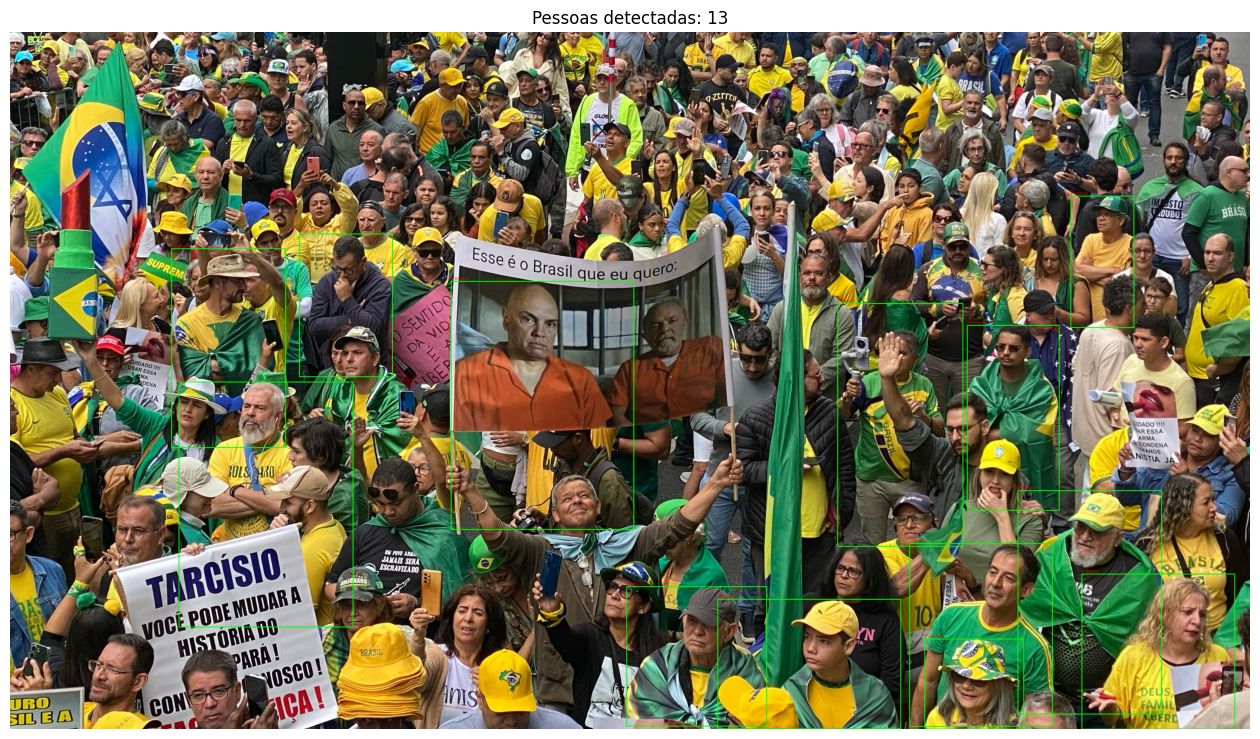

13

In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Caminho da imagem
caminho_imagem = "/content/manifestacao 06-04.jpeg"

# Carrega o modelo YOLO pré-treinado (focado em velocidade e leveza)
modelo = YOLO("yolov8s.pt")

# Carrega a imagem
imagem = cv2.imread(caminho_imagem)

# Converte BGR para RGB (para exibição correta)
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Executa a detecção
resultados = modelo(imagem_rgb)

# Inicializa contador de pessoas
contador_pessoas = 0

# Marca as detecções de pessoas
for resultado in resultados:
    for caixa, classe in zip(resultado.boxes.xyxy, resultado.boxes.cls):
        if int(classe) == 0:  # classe 0 representa "pessoa"
            contador_pessoas += 1
            x1, y1, x2, y2 = map(int, caixa)
            cv2.rectangle(imagem_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(imagem_rgb, 'Pessoa', (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Exibe a imagem com as marcações
plt.figure(figsize=(16, 10))
plt.imshow(imagem_rgb)
plt.axis("off")
plt.title(f"Pessoas detectadas: {contador_pessoas}")
plt.show()

# Retorna o número de pessoas detectadas
contador_pessoas
